In [17]:
import pickle
import numpy as np

X_train, y_train, X_train_skel_features = None, None, None
with open("train_info", "rb") as fin:
    data = pickle.load(fin)
    X_train, y_train, X_train_skel_features = data["data"], data["labels"], data["skel_features"]

X_test, y_test, X_test_skel_features = None, None, None
with open("test_info", "rb") as fin:
    data = pickle.load(fin)
    X_test, y_test, X_test_skel_features = data["data"], data["labels"], data["skel_features"]

In [18]:
np.unique(X_train)

array([0, 1], dtype=uint8)

In [19]:
def get_edges_ged_rad(skel_features):
    edges_x = []
    edges_y = []
    degs = set()
    rads = set()
    for i, d in enumerate(skel_features):
        if i % 4 == 0:
            edges_x.append(d)
        if i % 4 == 1:
            edges_y.append(d)
        if i % 4 == 2:
            degs.add((edges_x[-1], edges_y[-1], d))
        if i % 4 == 3:
            rads.add((edges_x[-1], edges_y[-1], d))
    
    return edges_x, edges_y, list(degs), list(rads)

In [24]:
def draw_skeleton(image, features):
    res_x, res_y, res_deg, res_rad = get_edges_ged_rad(features)
    
    fig = plt.figure(figsize=(18, 8))

    ax = fig.add_subplot(121)
    ax.imshow(image.reshape((s, s)), cmap="gray", interpolation="none")
    print(image.shape, s)

    for i in range(0, len(res_x), 2):
        ax.plot(res_x[i:i + 2], s - np.array(res_y[i:i + 2]), color="black")

    for i in range(len(res_deg)):
        x, y, d = res_deg[i]
        ax.scatter([x], [s - y], color="blue", s=5)
        ax.text(x, s - y, str(int(d)), fontsize=16, color="red")

    ax = fig.add_subplot(122)

    ax.imshow(image.reshape((s, s)), cmap="gray", interpolation="none")

    for i in range(0, len(res_x), 2):
        ax.plot(res_x[i:i + 2], s - np.array(res_y[i:i + 2]), color="black")

    for i in range(len(res_rad)):
        x, y, r = res_deg[i]
#         print(x,y)
        circle = plt.Circle((x, s - y), r, color="cyan", ls="-", linewidth=2, fill=False)
        ax.scatter([x], [s - y], color="blue", s=5)
        ax.add_patch(circle)

    fig.show()

In [25]:
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline

In [26]:
s = int(np.sqrt(X_train.shape[1]))

**ВНИМАНИЕ! Здесь отрисовщик автоматически отражает картинку симметрично по оси Y**

(784,) 28


/usr/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


(784,) 28
(784,) 28
(784,) 28
(784,) 28
(784,) 28
(784,) 28
(784,) 28
(784,) 28
(784,) 28
(784,) 28
(784,) 28
(784,) 28
(784,) 28
(784,) 28
(784,) 28
(784,) 28
(784,) 28
(784,) 28
(784,) 28


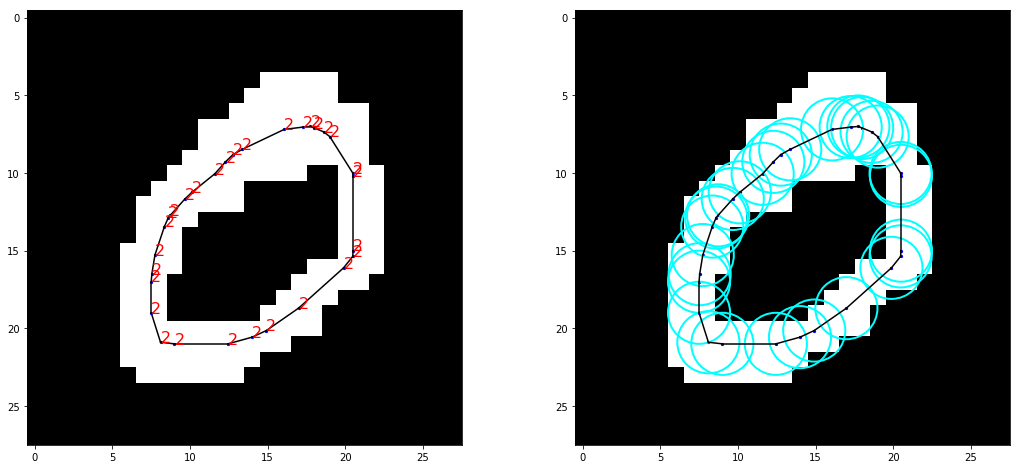

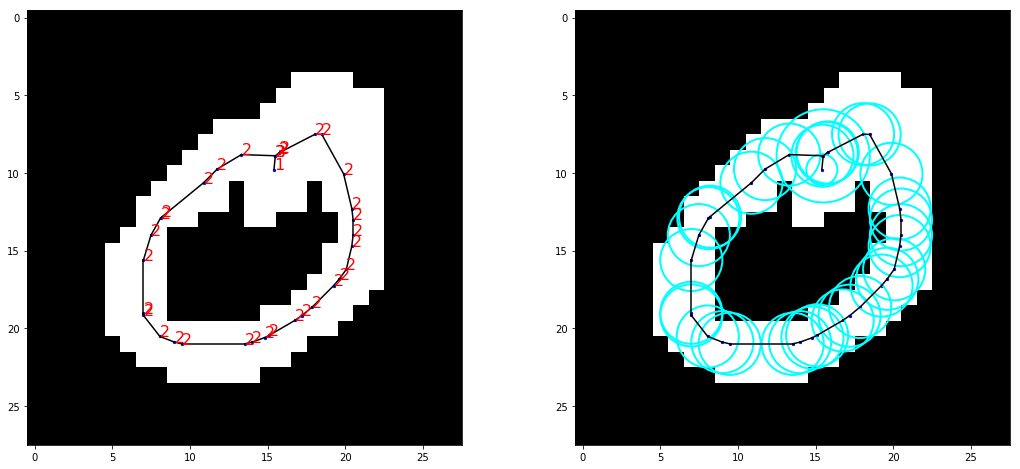

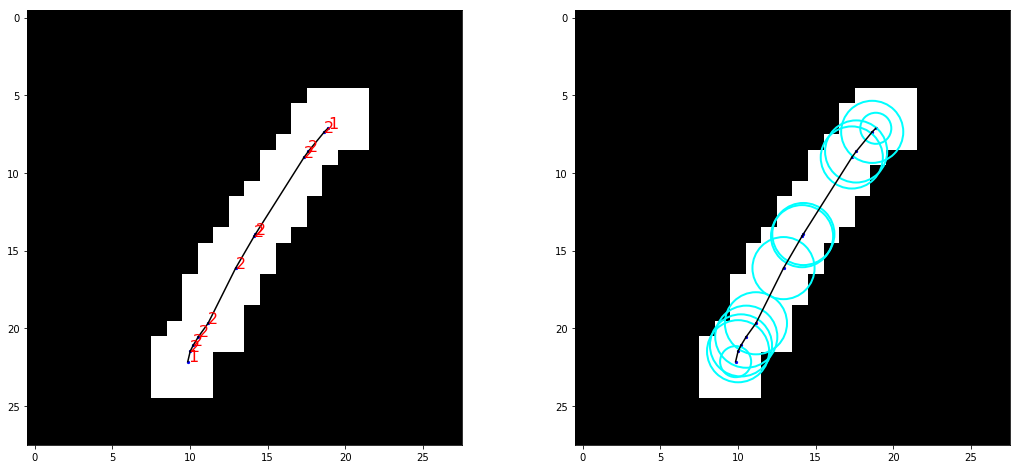

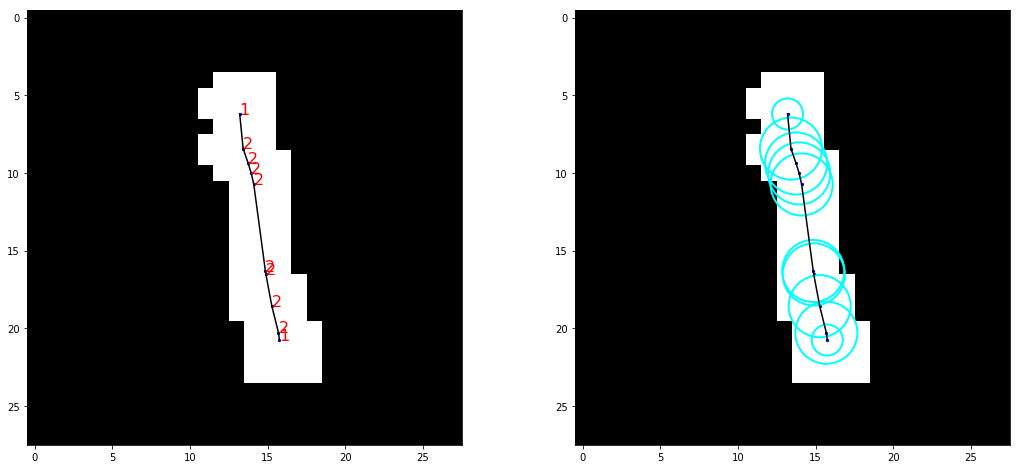

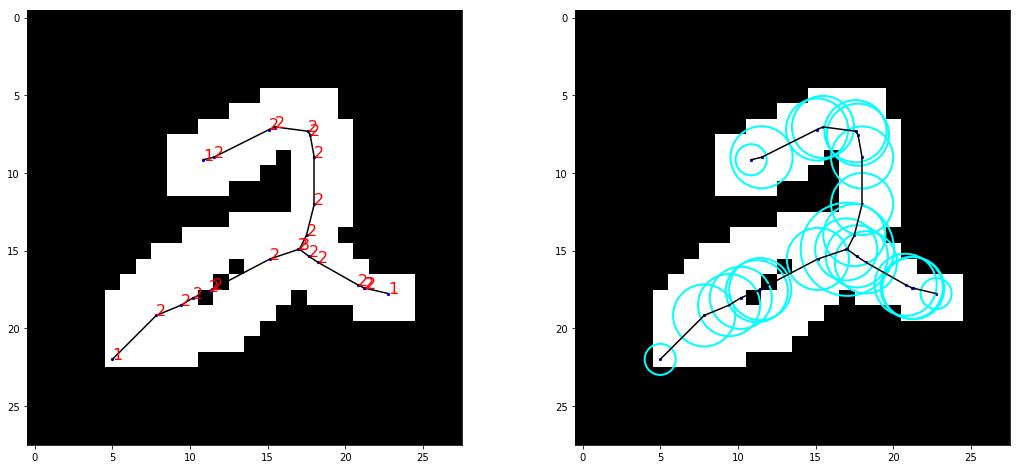

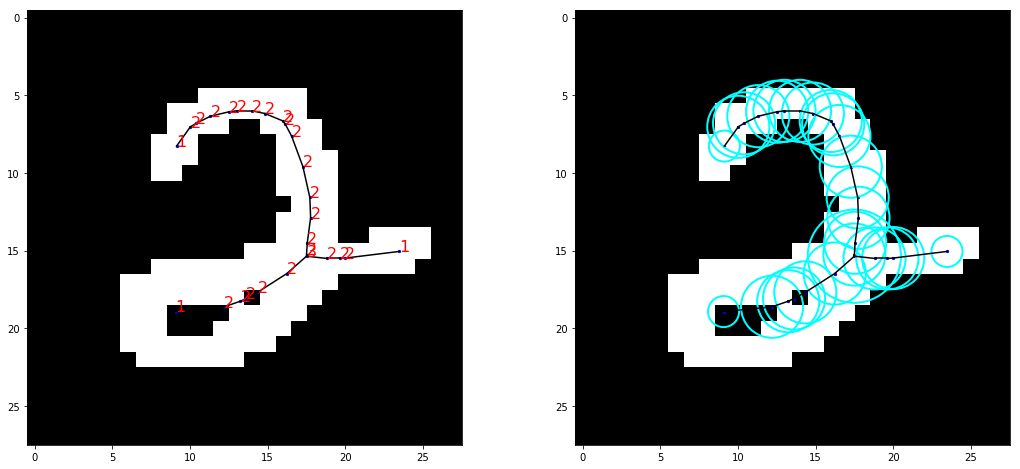

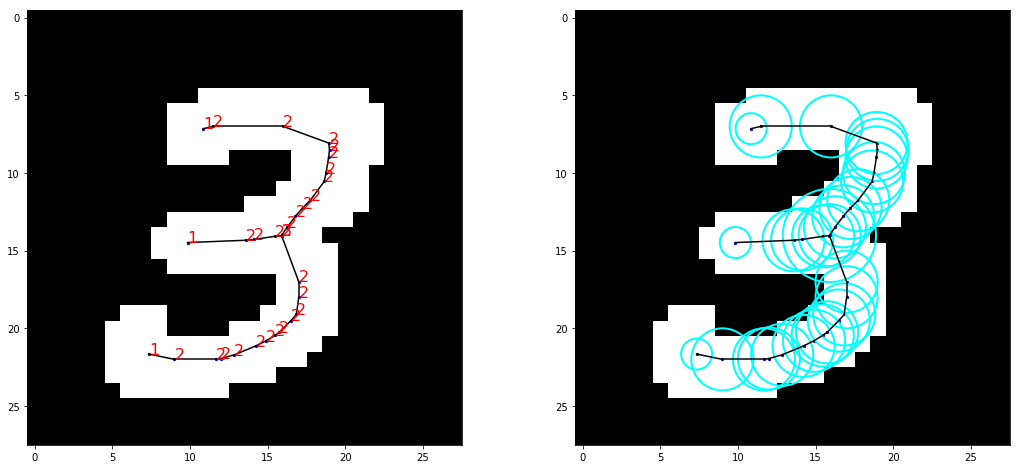

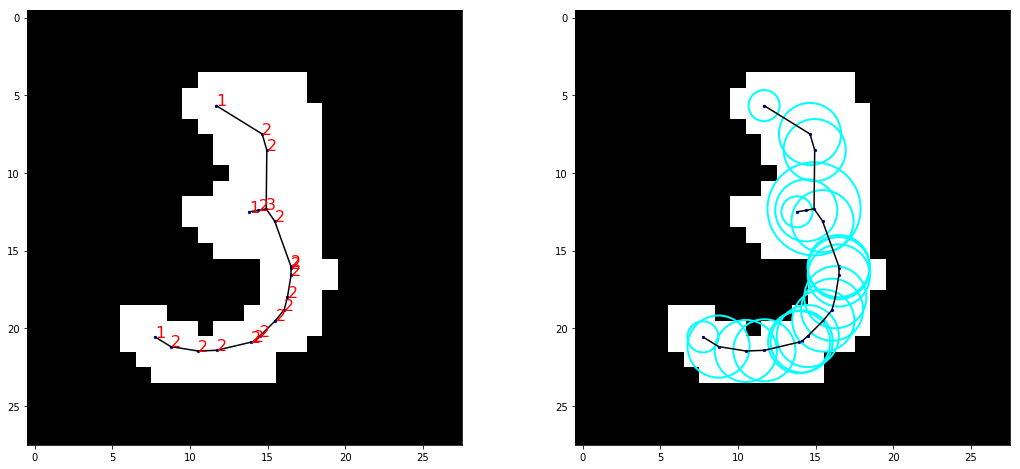

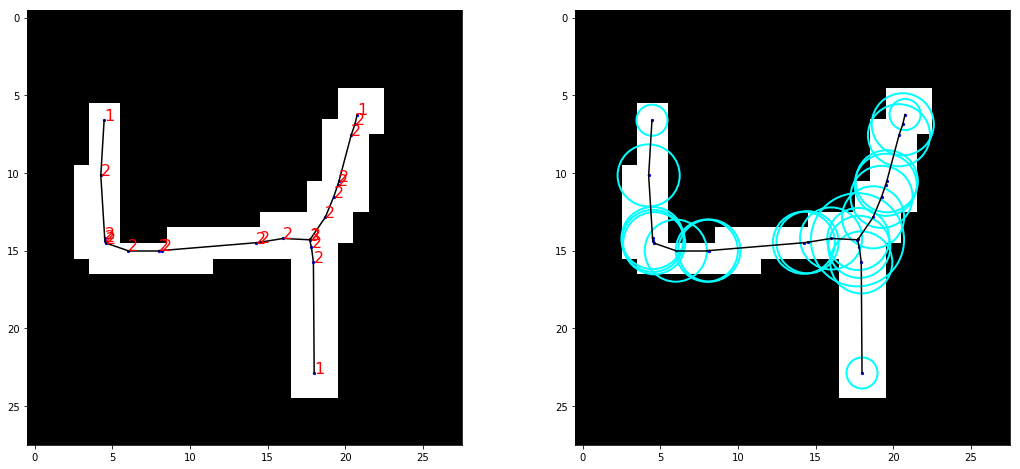

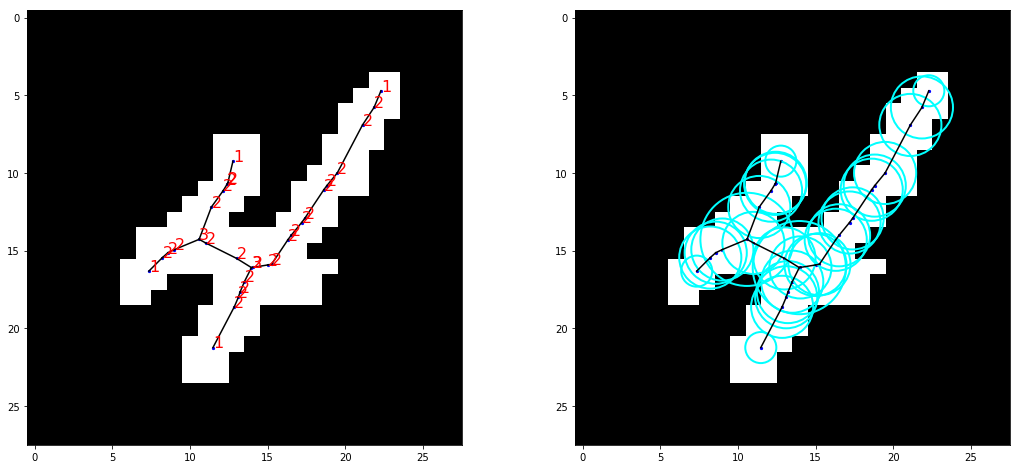

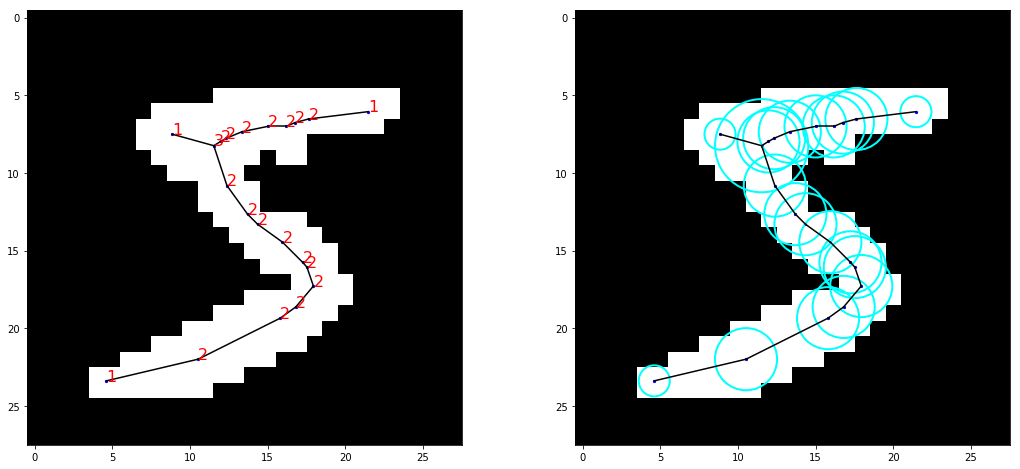

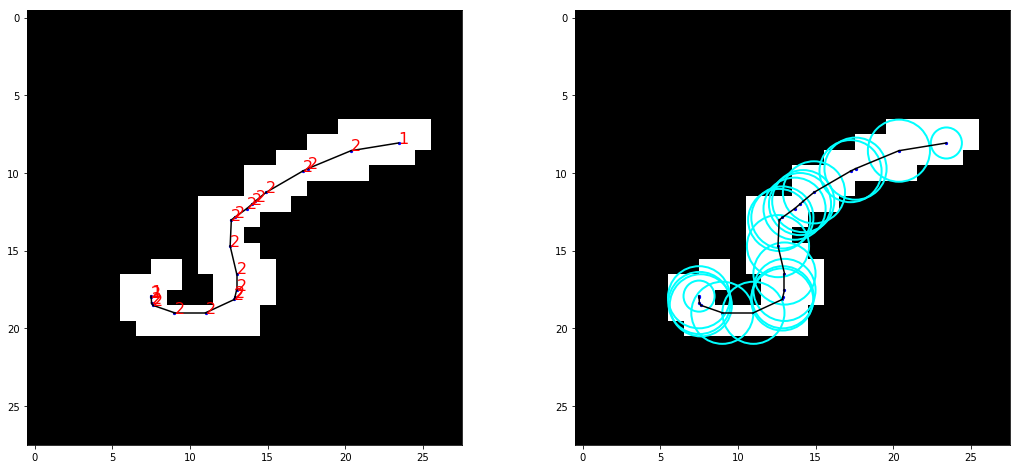

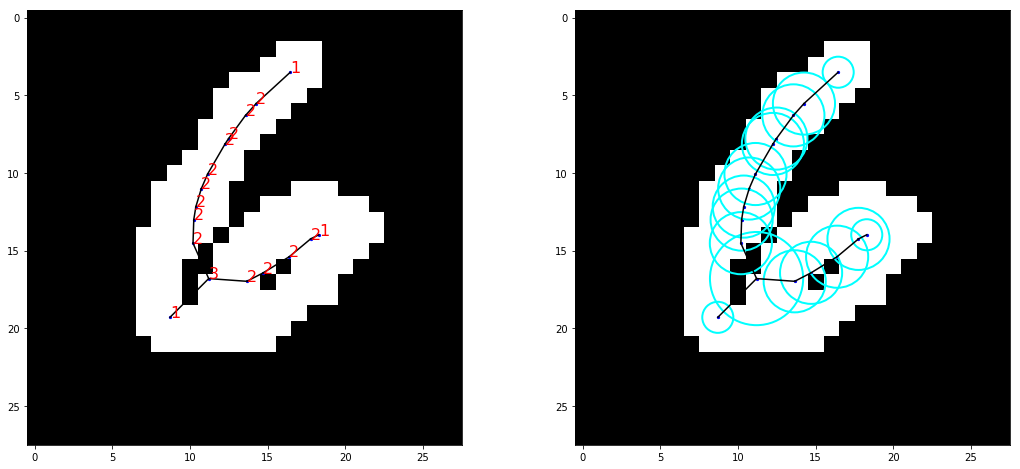

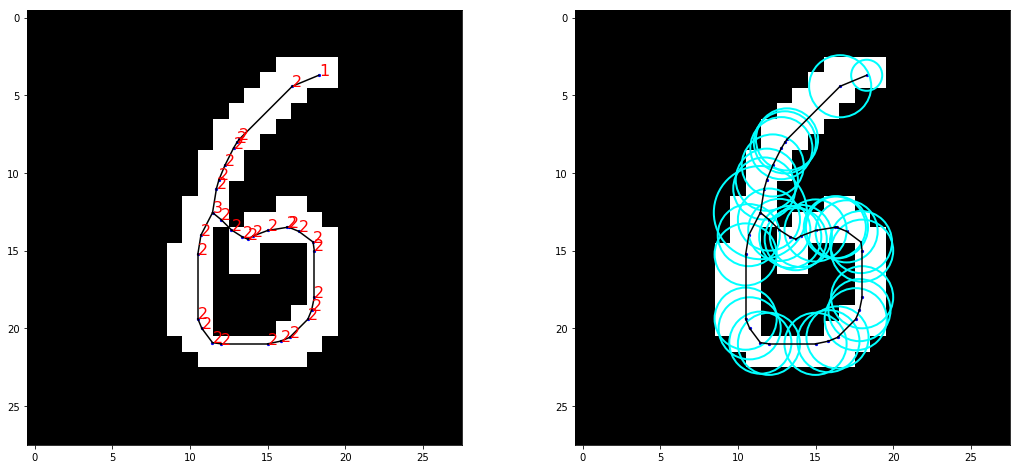

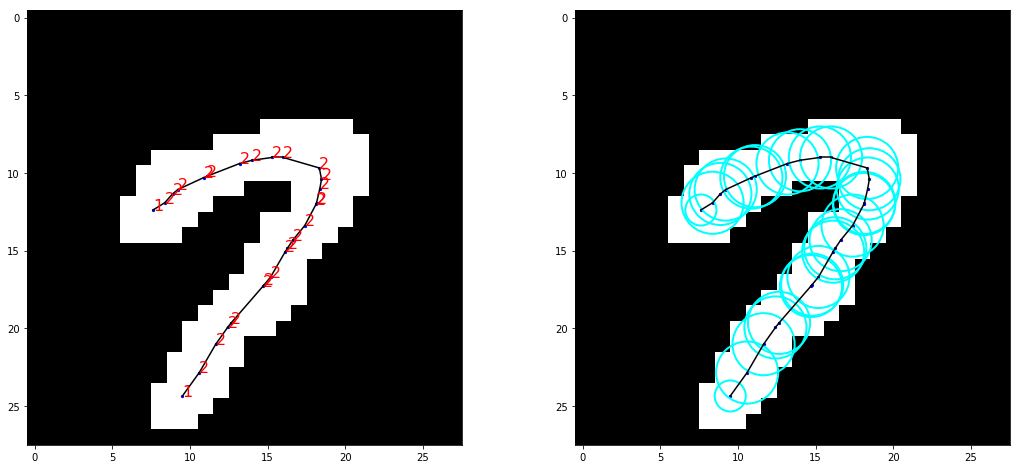

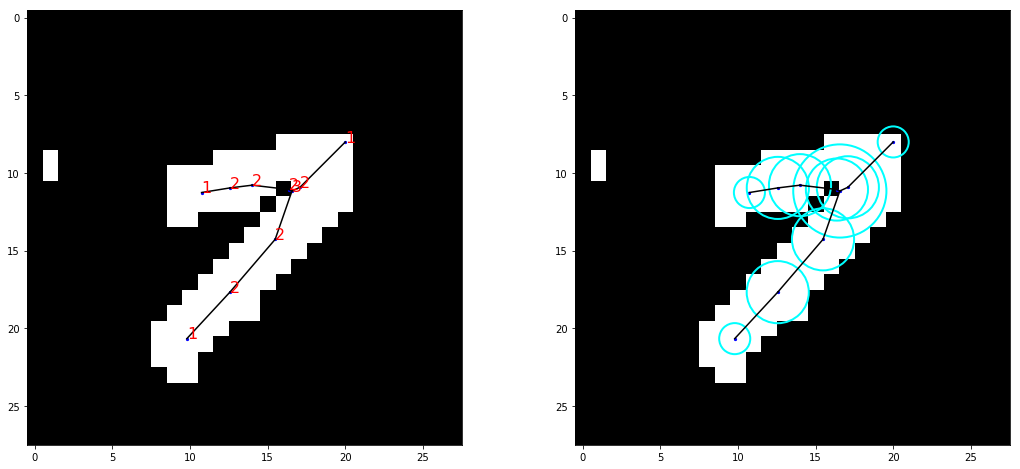

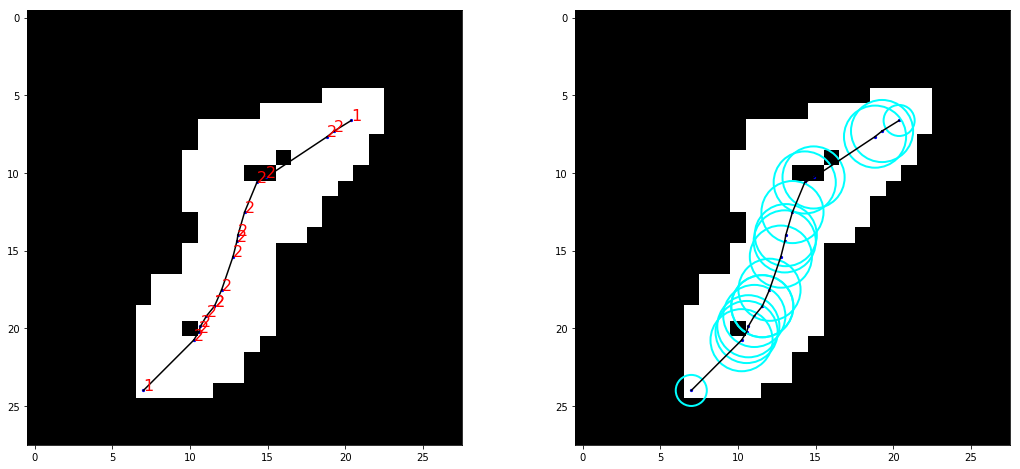

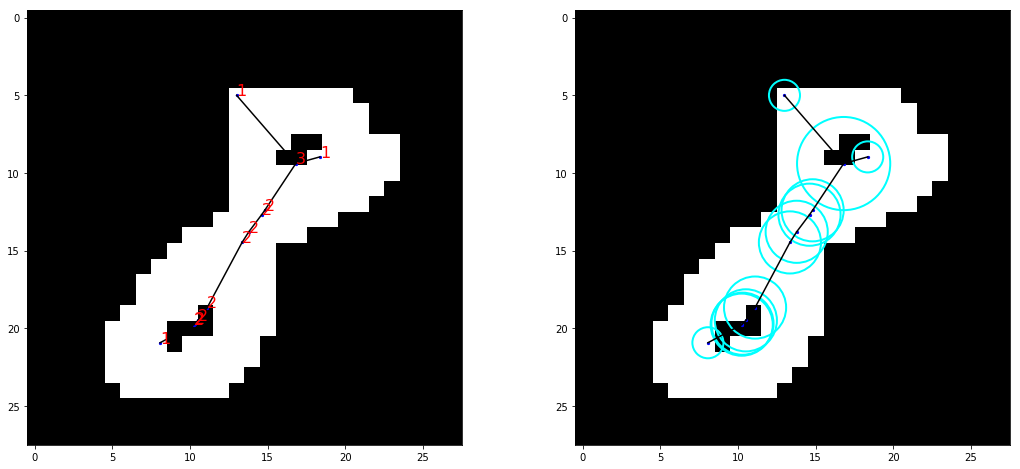

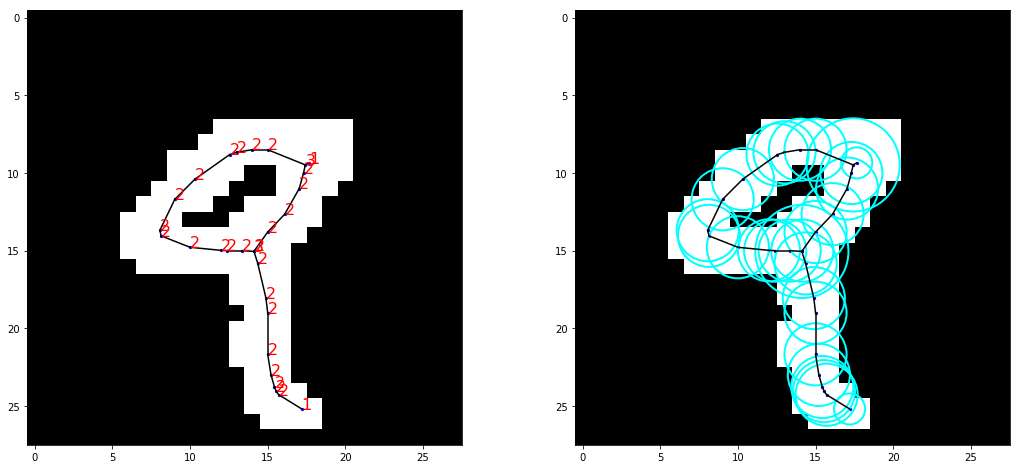

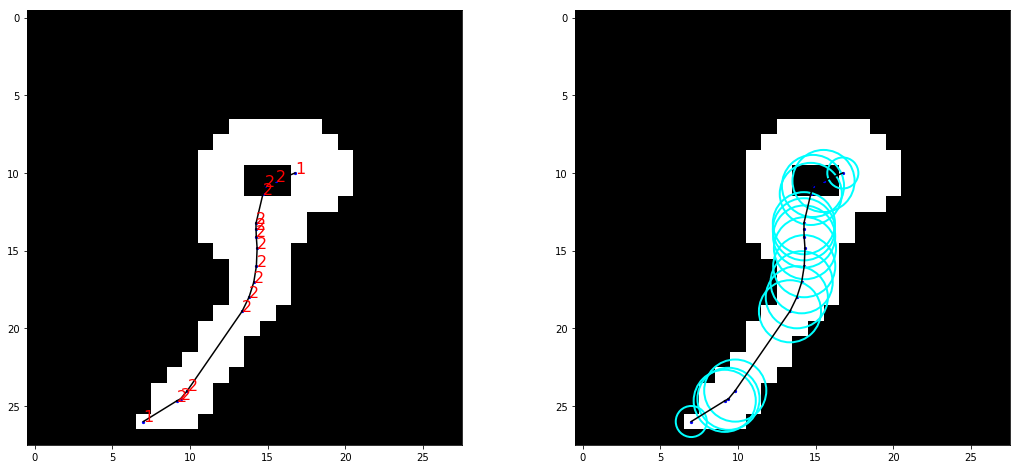

In [27]:
for i in range(10):
    idx1, idx2 = np.where(y_train == i)[0][:2]
    draw_skeleton(X_train[idx1, :], X_train_skel_features[idx1])
    draw_skeleton(X_train[idx2, :], X_train_skel_features[idx2])